# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** L

**Names:**

* Lee, Pierre-Alexandre Wen Hao Loïs
* Monbaron, Aurélien Ken
* Wagner, Patrik Alexander

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
#import libraries
import networkx as nx
import numpy as np
import scipy
from scipy import stats 
import matplotlib.pyplot as plt

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [2]:
G = nx.read_edgelist('../data/network1.csv', comments='#', delimiter=',', nodetype=int, encoding="utf-8")

In [3]:
nb_nodes = nx.number_of_nodes(G)
nb_edges = nx.number_of_edges(G)
print("Number of nodes: ", nb_nodes)
print("Number of edges: ", nb_edges)

Number of nodes:  13033
Number of edges:  18584


#### Exercise 2.2:  Node degree distribution

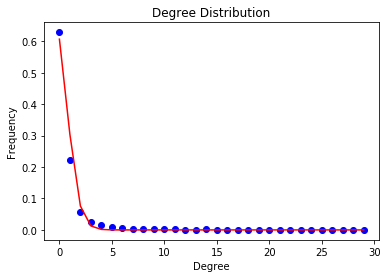

In [4]:
#Poisson distribution
def poisson(x, lamb=0.5) :
    return np.power(lamb, x) / np.math.factorial(x) * np.math.exp(-lamb)

#Degree distribution
node_degree = nx.degree_histogram(G)
hist = [x/nb_nodes for x in node_degree if x > 0]

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.plot(hist[:30], 'bo')
plt.plot([poisson(x) for x in range(30)], 'r')
plt.show()

As we can see on the graph, it is close to a Poisson distribution with lambda=0.5

#### Exercise 2.3: Giant component

In [5]:
nb_component = nx.number_connected_components(G)
print('Number of connected components: ', nb_component)

Number of connected components:  192


In [6]:
connected_graph = nx.connected_component_subgraphs(G)
giant_size = max([len(x) for x in connected_graph])
print('Size of the biggest component: ', giant_size)

Size of the biggest component:  12576


It is obviously a giant component, as it's size is 12576.

#### Exercise 2.4: Short paths & Small-worlds

In [ ]:
path_length = [nx.all_pairs_shortest_path_length(x) for x in nx.connected_component_subgraphs(G)]
size = length(path_length)
path_hist = nx.histogram(path_length)
hist = [x/size for x in path]
plt.plot(hist)

#### Exercise 2.5: Network comparison

In [7]:
G2 = nx.read_edgelist('../data/network2.csv', comments='#', delimiter=',', nodetype=int, encoding="utf-8")

In [8]:
nb_nodes = nx.number_of_nodes(G2)
nb_edges = nx.number_of_edges(G2)
print("Number of nodes: ", nb_nodes)
print("Number of edges: ", nb_edges)

Number of nodes:  26542
Number of edges:  43516


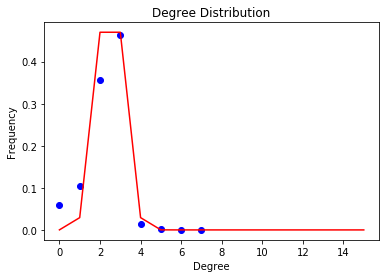

In [45]:
#Binomial distribution
def binom(k, n, p) :
    return (np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))) * np.power(p, k) * np.power(1-p, n-k)

#Poisson distribution
def poisson(x, lamb=0.9) :
    return np.power(lamb, x) / np.math.factorial(x) * np.math.exp(-lamb)

#Degree distribution
node_degree = nx.degree_histogram(G2)
hist = [x/nb_nodes for x in node_degree if x > 0]

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.plot(hist[:15], 'bo')
#plt.plot([poisson(x) for x in range(30)], 'r')
#plt.plot([binom(k, 26542, 0.00003) for k in range(15)], 'r')
#plt.plot([stats.chi2.pdf(k, 3) for k in range(16)], 'o')
plt.plot([scipy.stats.norm(2.5, 0.6).pdf(k) for k in range(16)], 'r')
plt.show()

In [7]:
nb_component = nx.number_connected_components(G2)
print('Number of connected components: ', nb_component)

Number of connected components:  5


In [8]:
connected_graph = nx.connected_component_subgraphs(G2)
giant_size = max([len(x) for x in connected_graph])
print('Size of the biggest component: ', giant_size)

Size of the biggest component:  26481


#### Exercise 2.6: Network identification